In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
ibex_data = pd.read_csv('./data/IBEX.csv')

In [4]:
ibex_data = ibex_data.dropna()
ibex_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-02-15,9834.599609,9913.400391,9764.099609,9865.299805,9865.290039,10256100.0
24,1993-03-19,9393.299805,9393.299805,9243.000000,9251.299805,9251.290039,6878000.0
36,1993-04-06,2612.300049,2612.300049,2599.300049,2603.199951,2603.197266,0.0
37,1993-04-07,2596.800049,2596.800049,2574.399902,2595.199951,2595.197266,0.0
40,1993-04-12,2595.199951,2603.500000,2580.800049,2601.399902,2601.397217,0.0


It seems like the data from the first years is not very consistent... Let's filter that data out and just use the data from 1995 onwards.

In [5]:
date_indexer = pd.to_datetime(ibex_data['Date']) > pd.to_datetime('19941231', format='%Y%m%d',)
ibex_data[date_indexer]

,Date,Open,High,Low,Close,Adj Close,Volume
490,1995-01-02,3087.699951,3109.000000,3077.899902,3092.199951,3092.196777,0.0
491,1995-01-03,3092.600098,3115.100098,3092.600098,3110.399902,3110.396729,0.0
492,1995-01-04,3110.399902,3121.300049,3094.500000,3107.199951,3107.196777,0.0
493,1995-01-05,3087.699951,3087.699951,3035.100098,3047.000000,3046.996826,0.0
495,1995-01-09,3044.199951,3044.199951,2973.600098,3003.600098,3003.597168,0.0
...,...,...,...,...,...,...,...
7015,2020-04-24,6641.299805,6710.799805,6578.100098,6613.899902,6613.899902,182925300.0
7016,2020-04-27,6780.899902,6790.100098,6667.299805,6731.799805,6731.799805,147263100.0
7017,2020-04-28,6724.600098,6857.899902,6707.899902,6836.399902,6836.399902,233782400.0
7018,2020-04-29,6829.399902,7055.700195,6816.799805,7055.700195,7055.700195,247762400.0


We are not planning on using Volume, but the fact that it wasn't measured back then makes me wonder if maybe I should just use data in which the Volume is greater than 0.

In [6]:
volume_indexer = ibex_data['Volume'] > 0.0
volume_indexer &= date_indexer

In [7]:
ibex_data[volume_indexer]

,Date,Open,High,Low,Close,Adj Close,Volume
1940,2000-07-24,10879.599609,10924.400391,10812.500000,10831.500000,10831.489258,5545600.0
1941,2000-07-25,10831.500000,10842.200195,10703.400391,10714.599609,10714.588867,7368000.0
1942,2000-07-26,10722.599609,10840.200195,10722.599609,10743.799805,10743.789063,6643800.0
1943,2000-07-27,10743.799805,10856.599609,10713.400391,10726.000000,10725.989258,6989400.0
1944,2000-07-28,10726.000000,10735.000000,10526.799805,10560.000000,10559.989258,6670000.0
...,...,...,...,...,...,...,...
7015,2020-04-24,6641.299805,6710.799805,6578.100098,6613.899902,6613.899902,182925300.0
7016,2020-04-27,6780.899902,6790.100098,6667.299805,6731.799805,6731.799805,147263100.0
7017,2020-04-28,6724.600098,6857.899902,6707.899902,6836.399902,6836.399902,233782400.0
7018,2020-04-29,6829.399902,7055.700195,6816.799805,7055.700195,7055.700195,247762400.0


It seems like volume started to be measured on the year 2000 so we'll go from that moment in time.

To compute the returns we'll do it with the adjusted close as follows:
$$
R_t = \frac{X_{t}-X_{t-1}}{X_{t-1}}
\text{ where } X_t \text{ is the adjusted close value at time } t
$$

In [8]:
adj_close = ibex_data[volume_indexer]['Adj Close'].values
returns = [(adj_close[i]-adj_close[i-1])/adj_close[i-1] for i in range(1, len(adj_close))]
print(len(returns))

5006


In [9]:
returns.insert(0, 0)
print(len(returns))

5007


In [10]:
ibex_data_clean = ibex_data[volume_indexer].copy()
ibex_data_clean['Returns'] = returns

In [11]:
ibex_data_clean.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
1940,2000-07-24,10879.599609,10924.400391,10812.500000,10831.500000,10831.489258,5545600.0,0.000000
1941,2000-07-25,10831.500000,10842.200195,10703.400391,10714.599609,10714.588867,7368000.0,-0.010793
1942,2000-07-26,10722.599609,10840.200195,10722.599609,10743.799805,10743.789063,6643800.0,0.002725
1943,2000-07-27,10743.799805,10856.599609,10713.400391,10726.000000,10725.989258,6989400.0,-0.001657
1944,2000-07-28,10726.000000,10735.000000,10526.799805,10560.000000,10559.989258,6670000.0,-0.015476


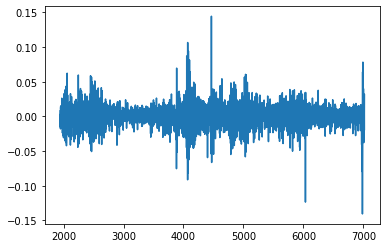

In [12]:
sns.lineplot(data=ibex_data_clean['Returns'])

It looks just like any other financial time series. We'll fit a C-RNN-GAN on this data to see what happens.

In [50]:
class DataLoader():
    def __init__(self, data):
        self.data = data
        self.n_vars = data.shape[1]
        self.data_to_use = None
    
    def rewind(self, argument):
        ## Some reset here
        self.data_to_use = None
    
    def get_batch(self, batchsize, songlength, random_offset=True, random_selection=True):
        ## It's not a song, but if I do it this way I don't have to modify the code of the CRNNGAN class.
        offset = 0
        if random_offset:
            offset = np.random.randint(0, songlength)
        total_seqs = int((len(self.data)-offset)/songlength)
        if total_seqs < batchsize:
            print('The batch size or the sequence length are too large')
            return (None, None)
        if self.data_to_use is None:
            self.data_to_use = [
                self.data.iloc[i*songlength+offset:(i+1)*songlength+offset].values.tolist()
                for i in range(total_seqs)
            ]
        indexes = [i for i in range(batchsize)]
        '''
        if random_selection:
            indexes = random.sample([i for i in range(len(self.data_to_use))], k=batchsize)
        '''
        if batchsize > len(self.data_to_use):
            self.data_to_use = []
            return (None, None)
        data_to_return = []
        for i in range(batchsize):
            index = np.random.randint(len(self.data_to_use)) if random_selection else indexes[i]
            data_to_return.append(self.data_to_use.pop(index))
        data_to_return = np.asarray(data_to_return).reshape(batchsize, songlength, self.n_vars)
        return (None, data_to_return)
        

In [14]:
ibexDataLoader = DataLoader(ibex_data_clean['Returns'])

In [15]:
batchsize = 10
seqlength = 30
_, ibex_batch = ibexDataLoader.get_batch(batchsize, seqlength)
while ibex_batch is not None:
    print(ibex_batch)
    _, ibex_batch = ibexDataLoader.get_batch(batchsize, seqlength)

[[[ 3.05782496e-03]
  [ 9.49345482e-06]
  [-3.75642076e-03]
  [-1.20693678e-02]
  [ 2.23430741e-03]
  [-5.02320241e-03]
  [-1.80594100e-02]
  [-1.43665967e-02]
  [-2.52868995e-02]
  [ 1.70132916e-02]
  [-2.21111345e-02]
  [-1.19615221e-02]
  [ 1.36416454e-02]
  [-1.23219923e-02]
  [ 3.67848957e-03]
  [ 2.96299843e-03]
  [ 1.20638620e-02]
  [-2.63416920e-03]
  [ 9.08604844e-03]
  [-7.27618176e-03]
  [ 5.41571529e-03]
  [-5.47760938e-03]
  [ 8.14464864e-03]
  [-2.22188148e-04]
  [-6.05042209e-03]
  [-1.03350709e-02]
  [-2.13069649e-02]
  [ 6.26372595e-03]
  [-4.17066364e-04]
  [ 1.30387619e-03]]

 [[ 6.47735311e-05]
  [ 1.69098500e-02]
  [-9.13088692e-03]
  [ 1.07240747e-02]
  [ 1.83722507e-02]
  [ 7.56993874e-03]
  [ 7.06922324e-03]
  [ 6.26123829e-03]
  [ 8.20812568e-03]
  [ 1.81895420e-04]
  [ 1.49464436e-03]
  [-1.57714302e-02]
  [ 3.86261011e-03]
  [ 9.23658810e-03]
  [ 2.93471715e-02]
  [ 7.35845360e-03]
  [-1.89196332e-03]
  [ 5.51088235e-03]
  [ 7.27853303e-03]
  [ 1.59182066e-03

In [18]:
ibexDataLoader.rewind('train')

In [19]:
_, ibex_batch = ibexDataLoader.get_batch(batchsize, seqlength)

In [22]:
ibex_batch.shape

(10, 30, 1)

In [23]:
_, ibex_batch_2 = ibexDataLoader.get_batch(batchsize, seqlength)

In [73]:
def welschTTest(input, target, reduction='mean'):
    ### Not done here, I should be computing the p-values!!!!
    #print('input: ', input)
    num_features = input.size()[-1]
    input = input.view(-1, num_features)
    target = target.view(-1, num_features)
    size_input = input.size()[0]
    size_target = target.size()[0]
    std_input, mean_input = torch.std_mean(input, dim=0, keepdim=True)
    std_target, mean_target = torch.std_mean(target, dim=0, keepdim=True)
    var_input = torch.pow(std_input, 2)
    var_target = torch.pow(std_target, 2)
    denominator = torch.pow(
        torch.add(
            torch.div(var_input, size_input),
            torch.div(var_target, size_target)
        ),
        0.5
    )
    numerator = torch.add(mean_input, other=mean_target, alpha=-1)

    v_numerator = torch.pow(denominator, 4)
    v_denominator = torch.add(
        torch.div(
            torch.pow(var_input, 2),
            torch.mul(torch.pow(torch.tensor(size_input), 2), size_input - 1)
        ),
        other = torch.div(
            torch.pow(var_target, 2),
            torch.mul(torch.pow(torch.tensor(size_target), 2), size_target - 1)
        )
    )

    t_statistic_all_vars = torch.div(numerator, denominator)
    v_degrees_all_vars = torch.div(v_numerator, v_denominator)

    p_vals = []
    for t_statistic, v_degrees in zip(t_statistic_all_vars[0], v_degrees_all_vars[0]):
        distr = torch.distributions.studentT.StudentT(df=v_degrees)
        p_vals.append(torch.exp(distr.log_prob(t_statistic)))
    
    p_vals = torch.stack(p_vals)
    print(p_vals)
    
    
    if reduction == 'mean':
        p_vals_out = torch.mean(p_vals)
    elif reduction == 'median':
        p_vals_out = torch.median(p_vals)
    elif reduction == 'max':
        p_vals_out = torch.max(p_vals)
        
    return t_statistic

In [59]:
welschTTest(torch.tensor(ibex_batch), torch.tensor(ibex_batch_2), reduction='mean')

tensor(0.3829, dtype=torch.float64)

In [27]:
ibex_batch.size

300

In [35]:
torch.pow(torch.tensor([1,2,3,4]), 2)

tensor([ 1,  4,  9, 16])

In [51]:
ibexDataLoader_ = DataLoader(ibex_data_clean[['Close','Returns']])

In [52]:
_, ibex_batch_ = ibexDataLoader_.get_batch(batchsize, seqlength)

In [53]:
ibex_batch_.shape

(10, 30, 2)

In [54]:
_, ibex_batch_2_ = ibexDataLoader_.get_batch(batchsize, seqlength)

In [74]:
welschTTest(torch.tensor(ibex_batch_), torch.tensor(ibex_batch_2_), reduction='mean')

tensor([6.5520e-07, 3.8591e-01], dtype=torch.float64)


tensor(0.2558, dtype=torch.float64)

In [63]:
from scipy.stats import ttest_ind

In [69]:
ttest_ind(ibex_batch_[:,:,0].reshape(-1, 1), ibex_batch_2_[:,:,0].reshape(-1, 1), equal_var=False)

Ttest_indResult(statistic=array([-5.22348825]), pvalue=array([2.55421467e-07]))

In [70]:
ttest_ind(ibex_batch_[:,:,1].reshape(-1, 1), ibex_batch_2_[:,:,1].reshape(-1, 1), equal_var=False)

Ttest_indResult(statistic=array([0.2558062]), pvalue=array([0.79819064]))